In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
file_path = '/Users/gamzeadibelli/OZU DS/CS552/CS552/All_Data_With_Gender.xlsx'
df = pd.read_excel(file_path)
df = df.drop_duplicates()

df.head()

,Name,Affiliation,Citations,Citations (Last 5 Years),h-index,h-index (Last 5 Years),i10-index,i10-index (Last 5 Years),Number of Publications,Scholar ID,Profile Link,University,City,Type,Opening Date,Gender
0,Azman Ismail SDU,"Professor, Suleyman Demirel University",10928.0,7696.0,35,25,182,103,806,f510a0YAAAAJ,https://scholar.google.com/citations?hl=en&use...,SÜLEYMAN_DEMİREL,ISPARTA,DEVLET,1992.0,Female
1,Gülcan Özkan,Suleyman Demirel University,6650.0,2273.0,31,23,69,44,138,ZHmsU48AAAAJ,https://scholar.google.com/citations?hl=en&use...,SÜLEYMAN_DEMİREL,ISPARTA,DEVLET,1992.0,Female
2,Zeynep Banu Güzel-Seydim,Süleyman Demirel University,5679.0,2566.0,32,25,51,42,133,uFYHyG4AAAAJ,https://scholar.google.com/citations?hl=en&use...,SÜLEYMAN_DEMİREL,ISPARTA,DEVLET,1992.0,Female
3,Yuksel Koseoglu,Suleyman Demirel University,5166.0,1627.0,37,24,55,39,92,KZNDnNwAAAAJ,https://scholar.google.com/citations?hl=en&use...,SÜLEYMAN_DEMİREL,ISPARTA,DEVLET,1992.0,Female
4,"Utku Köse, PhD., SM'IEEE, M'ACM",Assoc. Prof. of CEng || Suleyman Demirel Unive...,4971.0,3722.0,37,33,90,75,351,aTweWB4AAAAJ,https://scholar.google.com/citations?hl=en&use...,SÜLEYMAN_DEMİREL,ISPARTA,DEVLET,1992.0,Female


In [137]:
df = df.dropna(subset=["Type"])
df = df[df['Type'].str.strip() != '']

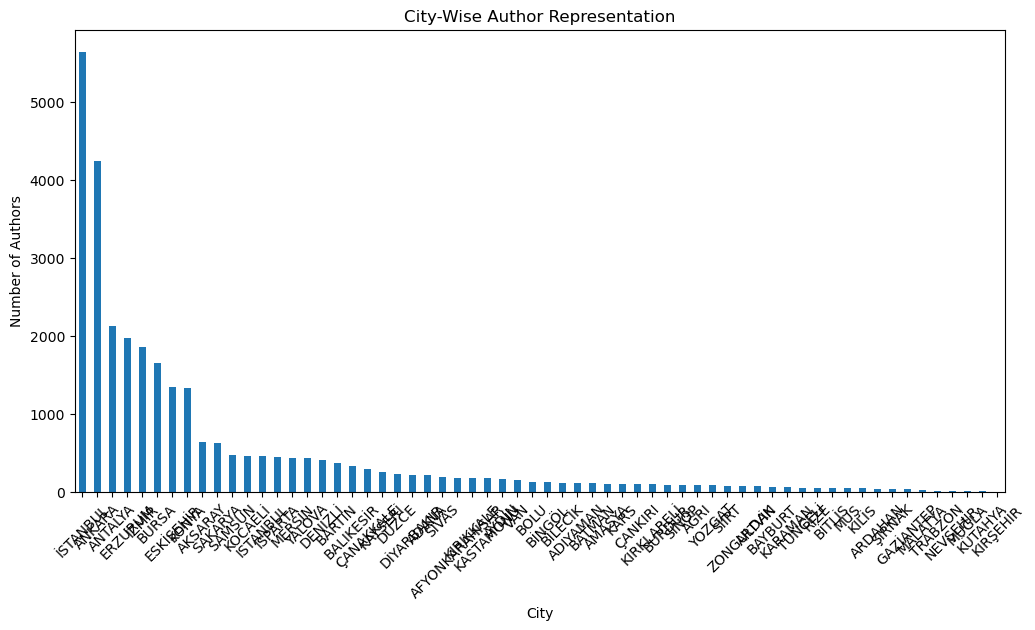

In [138]:
import seaborn as sns

#City-wise distribution
city_distribution = df['City'].value_counts()


plt.figure(figsize=(12, 6))
city_distribution.plot(kind='bar')
plt.title('City-Wise Author Representation')
plt.xlabel('City')
plt.ylabel('Number of Authors')
plt.xticks(rotation=45)
plt.show()


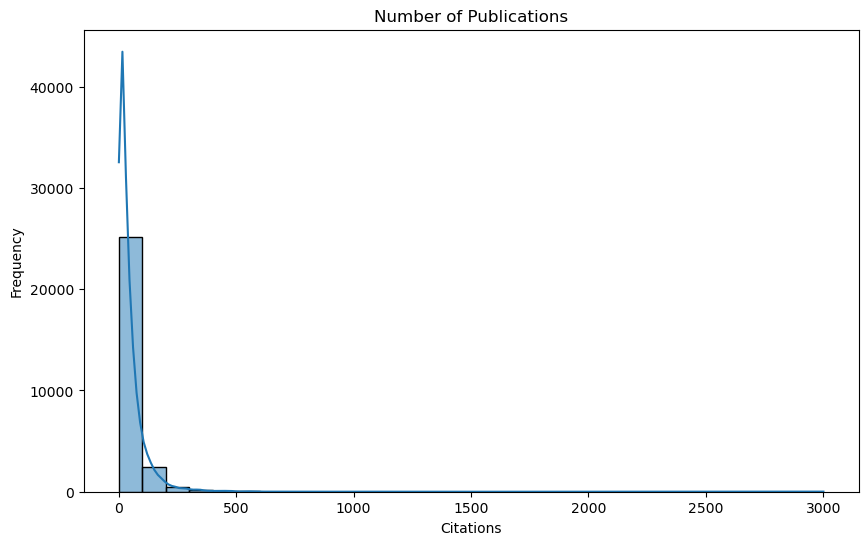

           Citations  Citations (Last 5 Years)       h-index  \
count   28364.000000              28364.000000  28364.000000   
mean      854.619835                429.917431      9.515160   
std      5940.833939               2559.063552     10.231486   
min         1.000000                  0.000000      1.000000   
25%        40.000000                 31.000000      3.000000   
50%       194.000000                128.000000      7.000000   
75%       705.000000                384.000000     13.000000   
max    311457.000000             142912.000000    251.000000   

       h-index (Last 5 Years)     i10-index  i10-index (Last 5 Years)  \
count            28364.000000  28364.000000              28364.000000   
mean                 7.355169     13.586694                  9.028734   
std                  6.973004     32.780312                 24.676480   
min                  0.000000      0.000000                  0.000000   
25%                  3.000000      1.000000               

In [139]:
#data cleaning

data_cleaned = df.dropna()
#data_cleaned['Opening Date'] = data_cleaned['Opening Date'].astype(int)

#Analysis
summary_statistics = data_cleaned[
    ['Citations', 'Citations (Last 5 Years)', 'h-index', 'h-index (Last 5 Years)', 
     'i10-index', 'i10-index (Last 5 Years)', 'Number of Publications']
].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Number of Publications'], bins=30, kde=True)
plt.title("Number of Publications")
plt.xlabel("Citations")
plt.ylabel("Frequency")
plt.show()

print(summary_statistics)

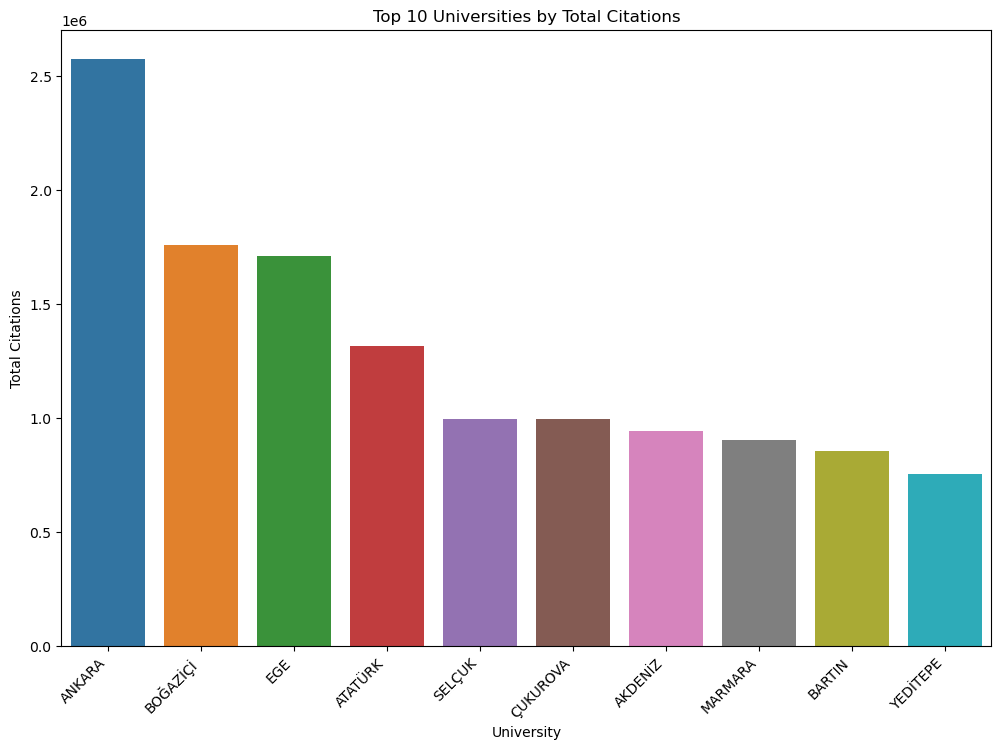

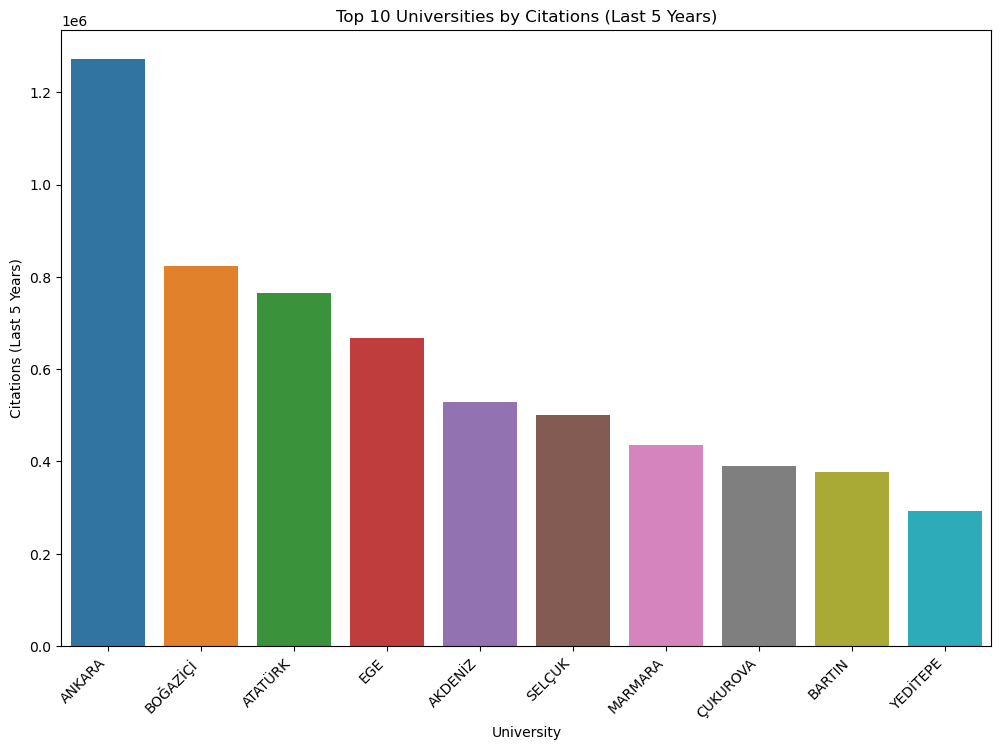

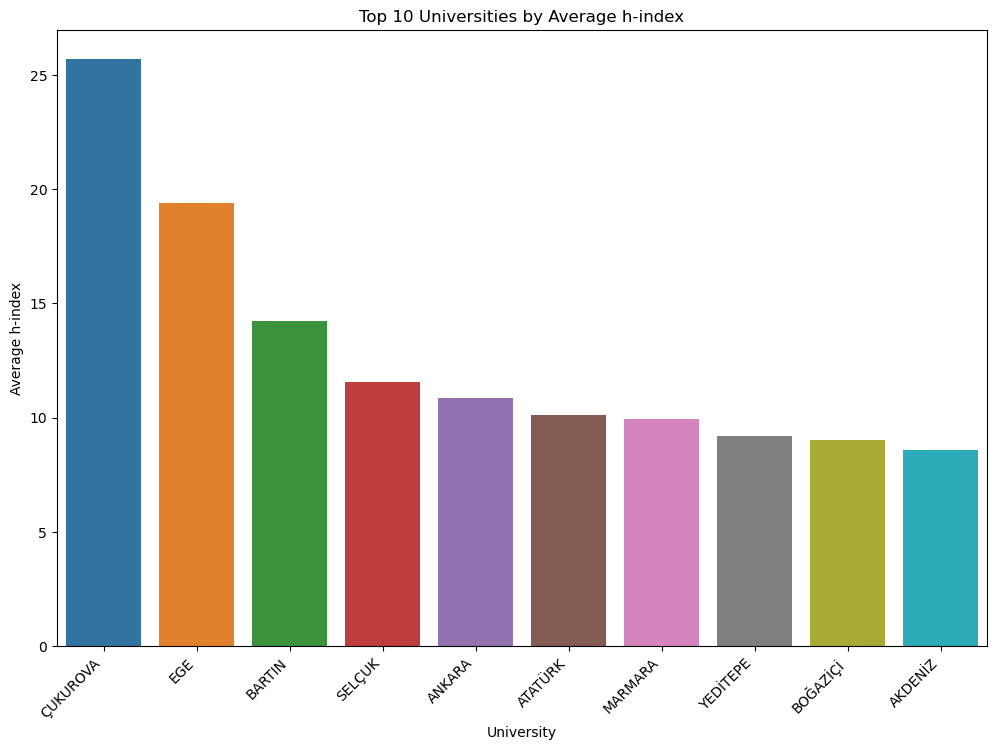

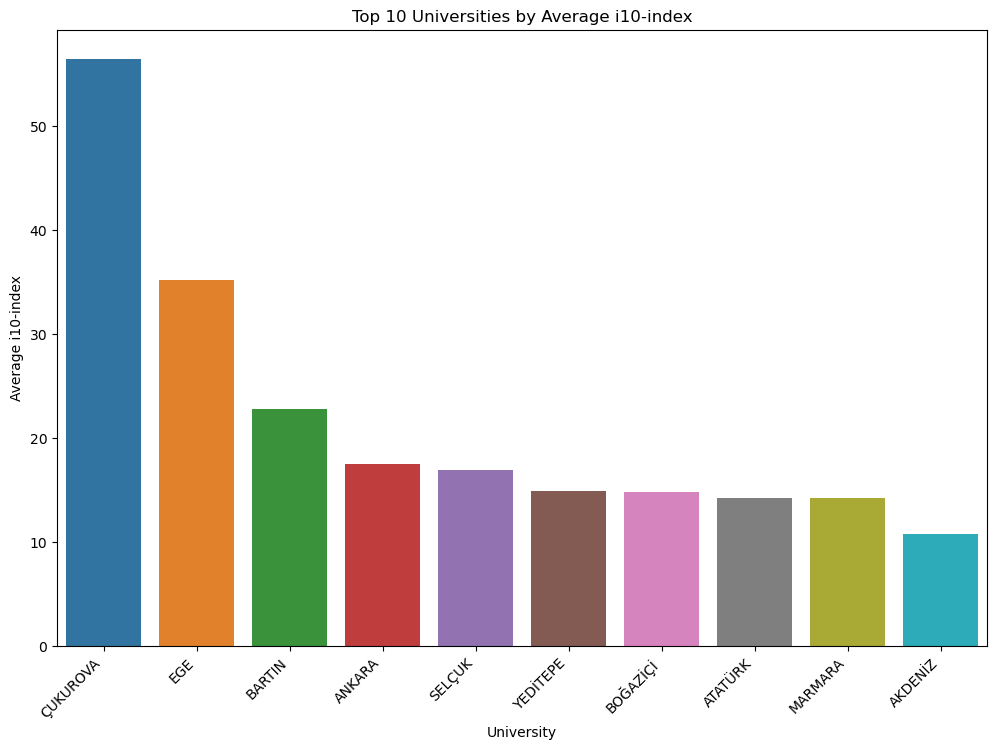

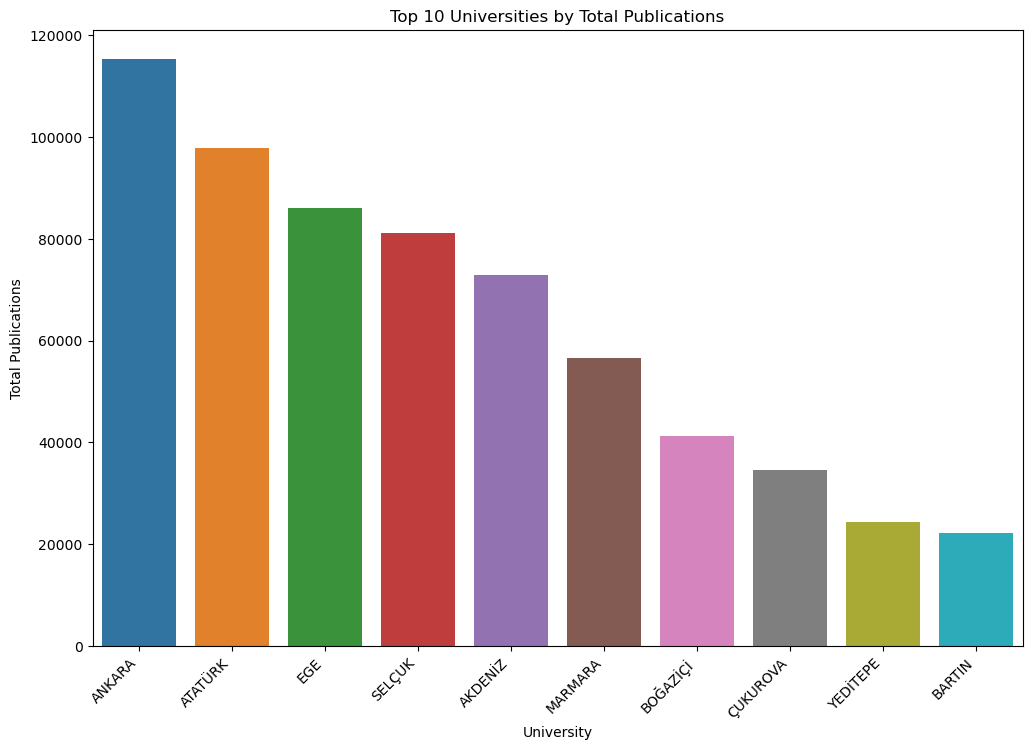

In [140]:
university_stats = data_cleaned.groupby('University').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_universities = university_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']

for metric, title in zip(metrics, titles):
    
    sorted_data = top_universities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Universities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("University")
    plt.show()


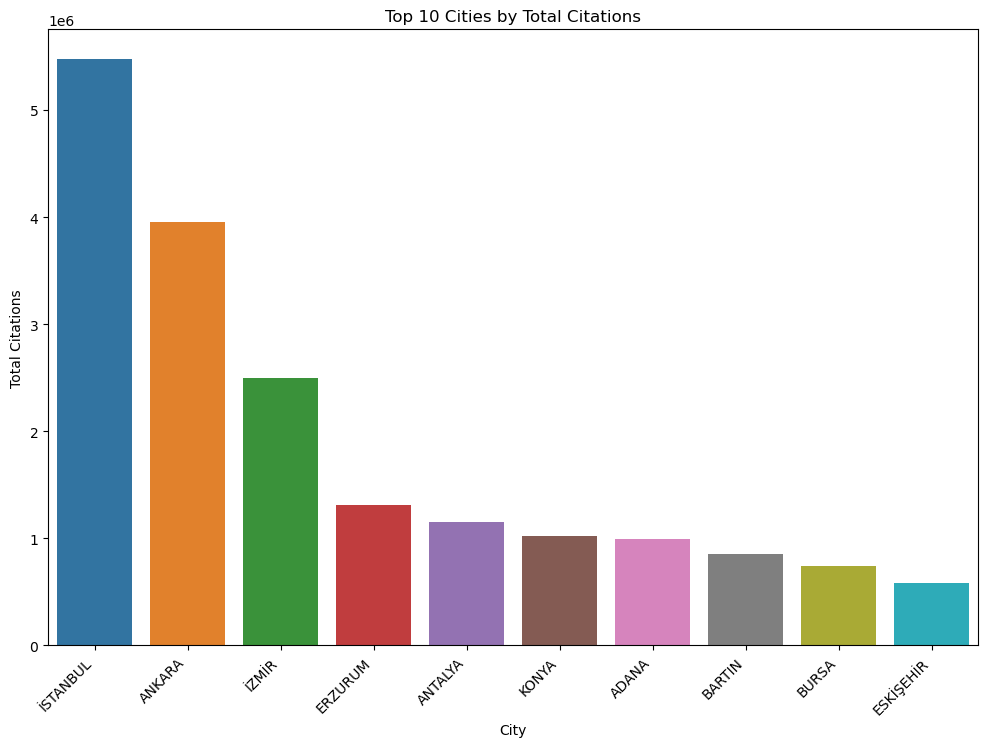

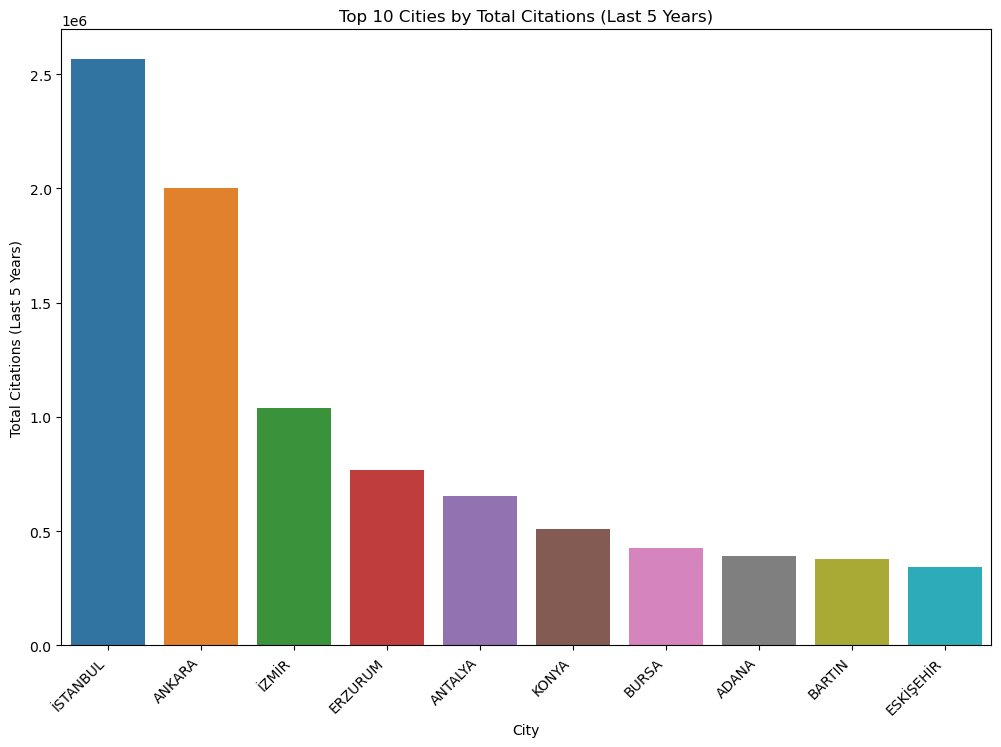

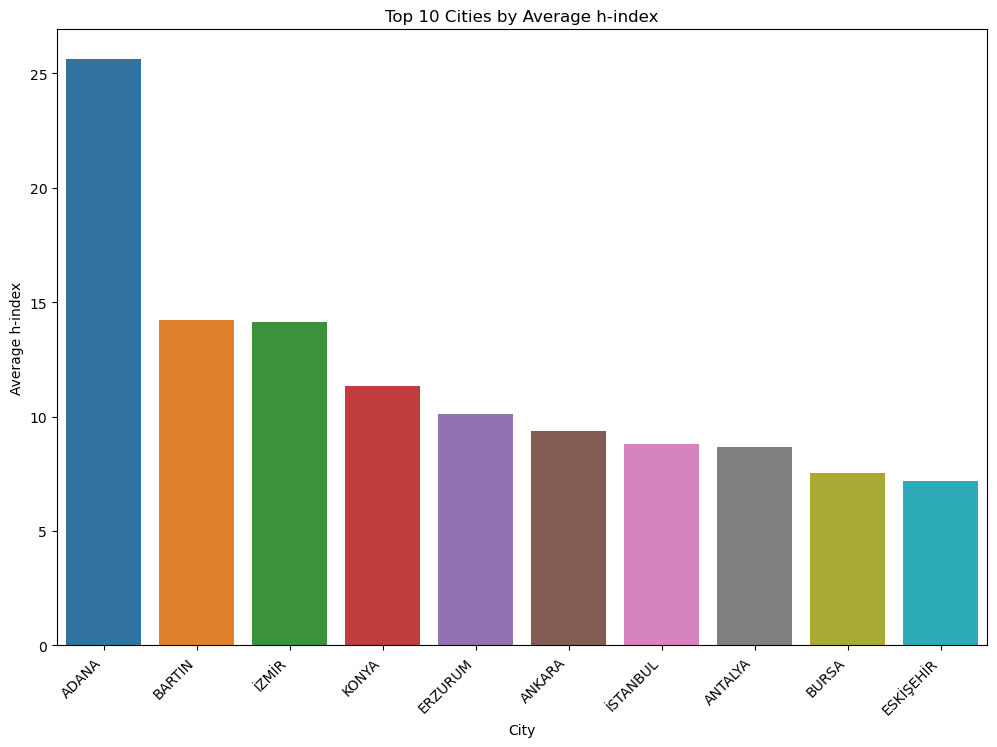

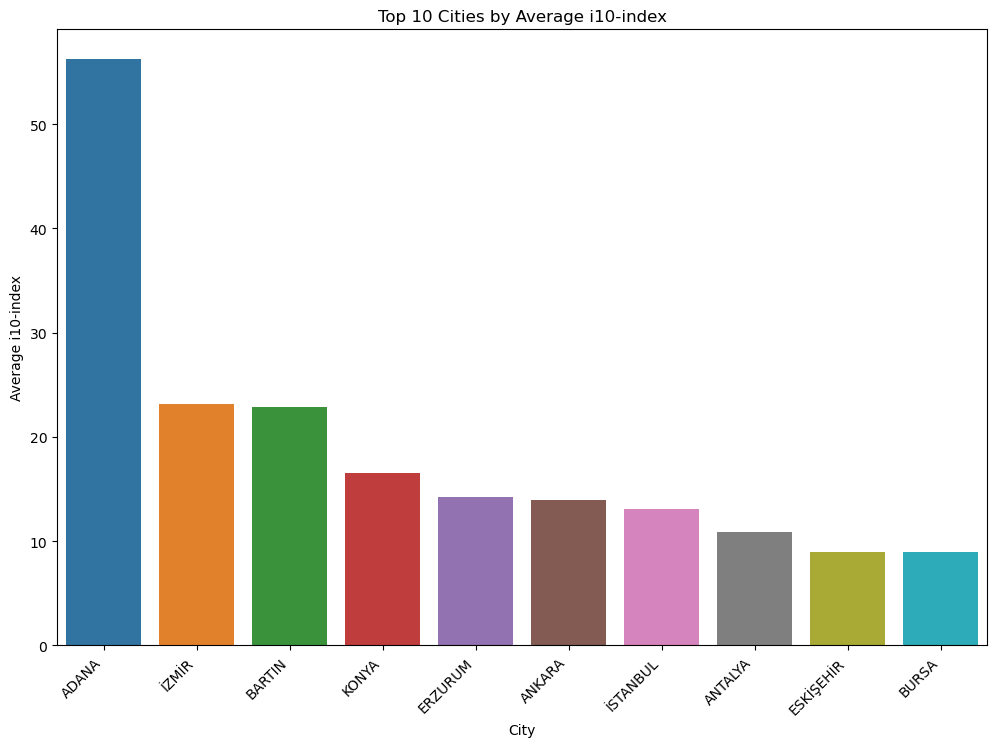

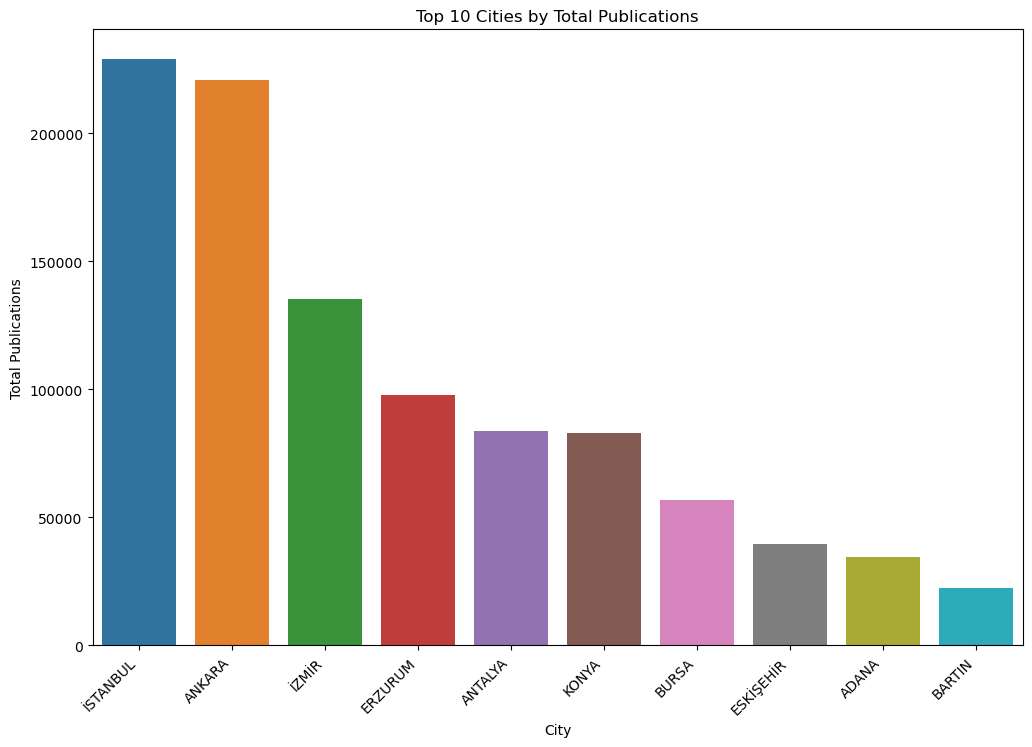

In [141]:
city_stats = data_cleaned.groupby('City').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_cities = city_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Total Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']


for metric, title in zip(metrics, titles):
    
    sorted_data = top_cities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Cities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("City")
    plt.show()


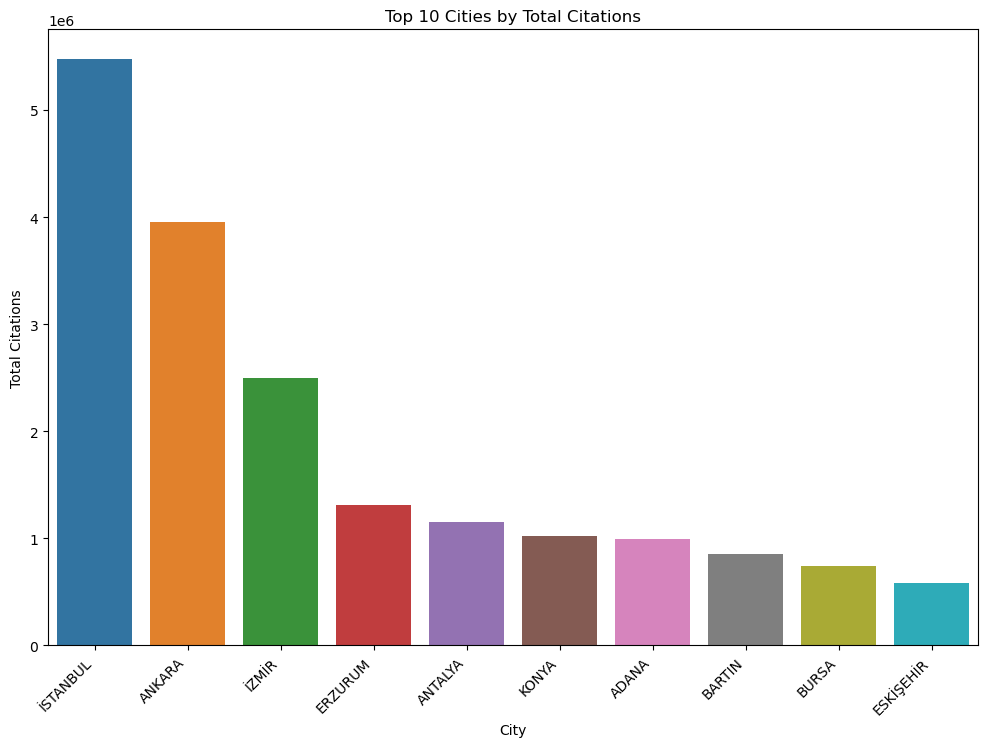

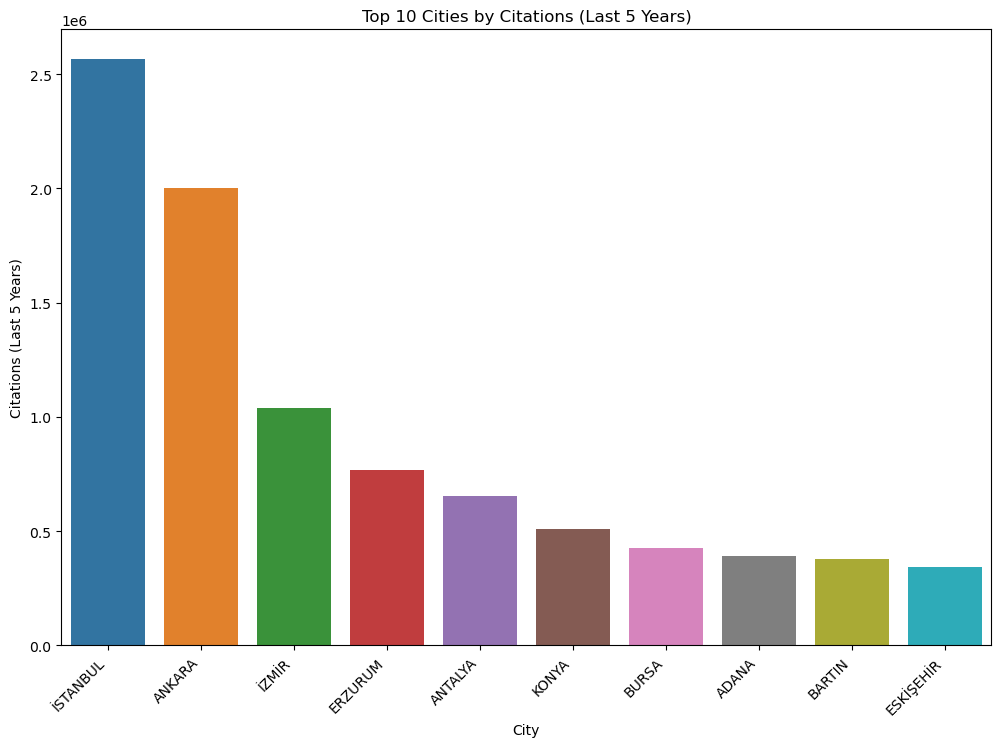

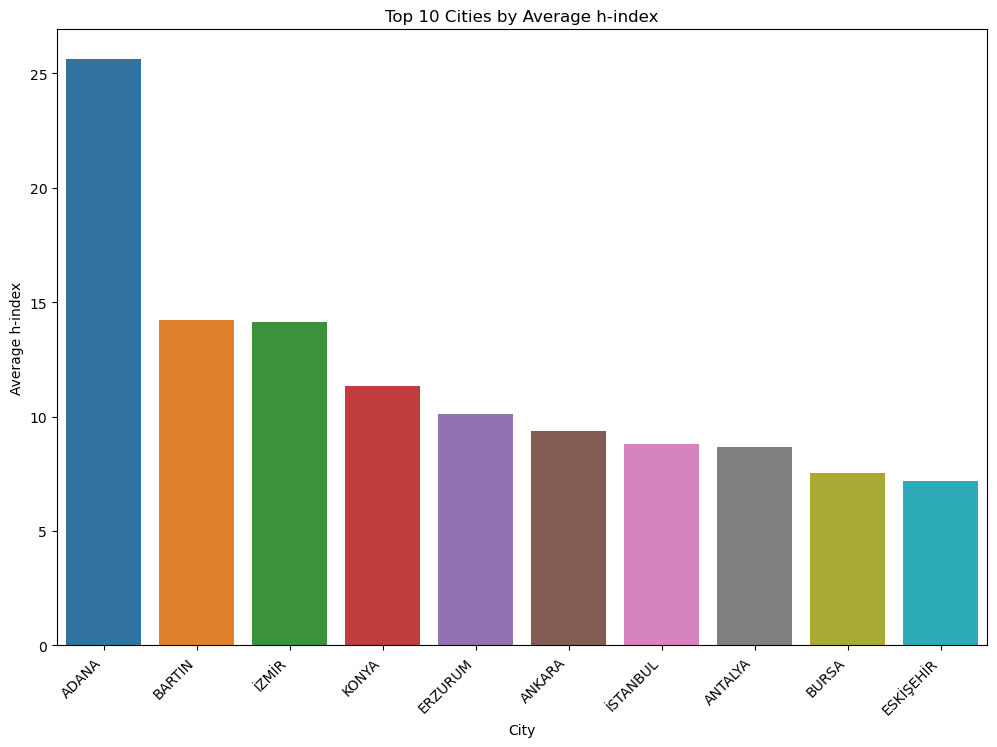

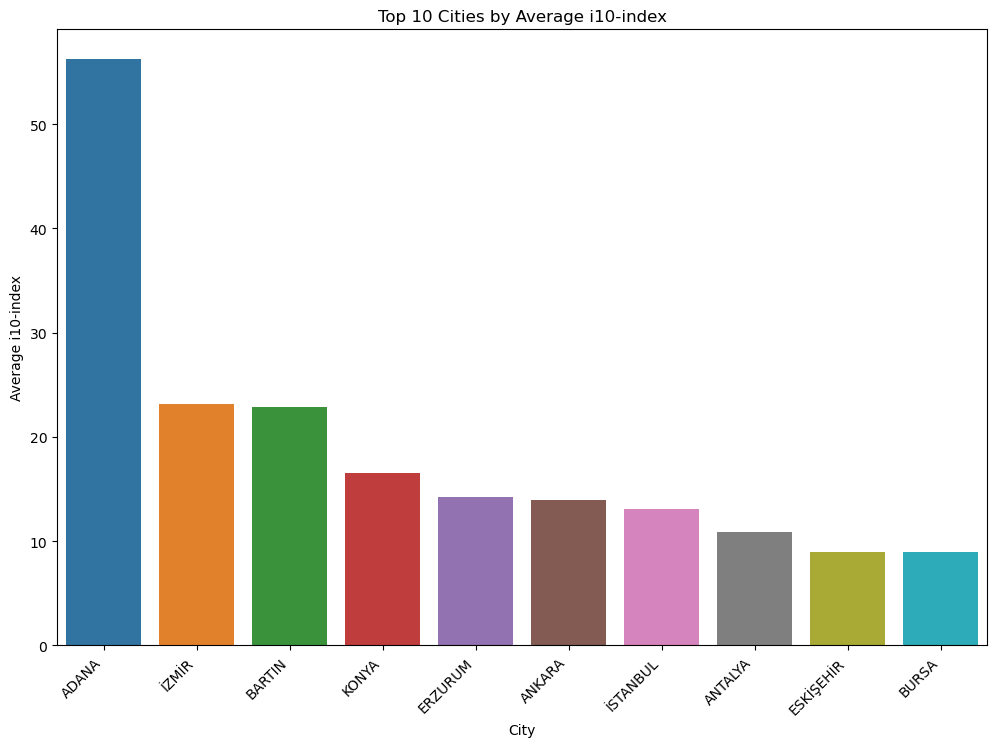

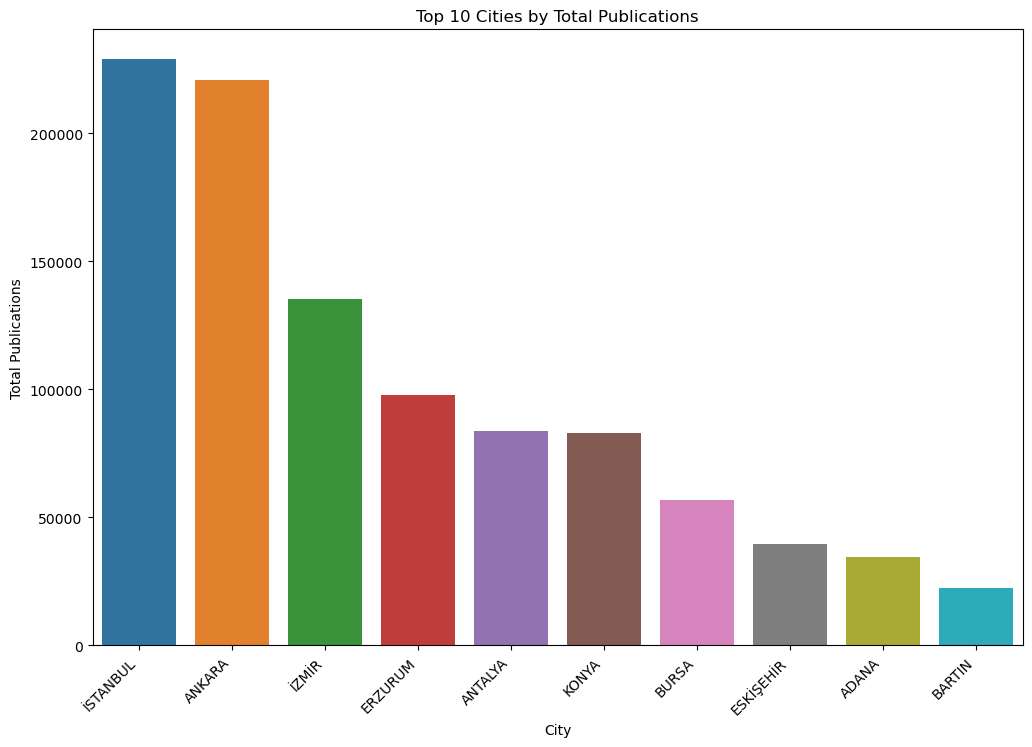

In [142]:
city_stats = data_cleaned.groupby('City').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_cities = city_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']


for metric, title in zip(metrics, titles):
    
    sorted_data = top_cities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Cities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("City")
    plt.show()


In [143]:
#efficiency
data_cleaned['Citations per Publication'] = data_cleaned['Citations'] / data_cleaned['Number of Publications']
top_efficiency_uni = data_cleaned.groupby('University')['Citations per Publication'].mean().sort_values(ascending=False)
print(top_efficiency_uni)

University
AFYONKARAHİSAR_SAĞLIK_BİLİMLERİ         44.866576
ÜSKÜDAR                                 36.986918
BEYKOZ                                  30.982012
KONYA_TEKNİK                            28.600151
ÇUKUROVA                                24.551243
                                          ...    
KARADENİZ_TEKNİK                         4.571429
KIRŞEHİR_AHİ_EVRAN                       3.947368
ANKARA_SOSYAL_BİLİMLER                   3.904221
KÜTAHYA_DUMLUPINAR                       2.248355
ATAŞEHİR_ADIGÜZEL_MESLEK_YÜKSEKOKULU     2.222222
Name: Citations per Publication, Length: 111, dtype: float64


/var/folders/c1/wz4767gs3gl7jgq5zqvt3xrh0000gn/T/ipykernel_3780/2395660296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Citations per Publication'] = data_cleaned['Citations'] / data_cleaned['Number of Publications']


In [144]:
print(data_cleaned.columns)

Index(['Name', 'Affiliation', 'Citations', 'Citations (Last 5 Years)',
       'h-index', 'h-index (Last 5 Years)', 'i10-index',
       'i10-index (Last 5 Years)', 'Number of Publications', 'Scholar ID',
       'Profile Link', 'University', 'City', 'Type', 'Opening Date ', 'Gender',
       'Citations per Publication'],
      dtype='object')


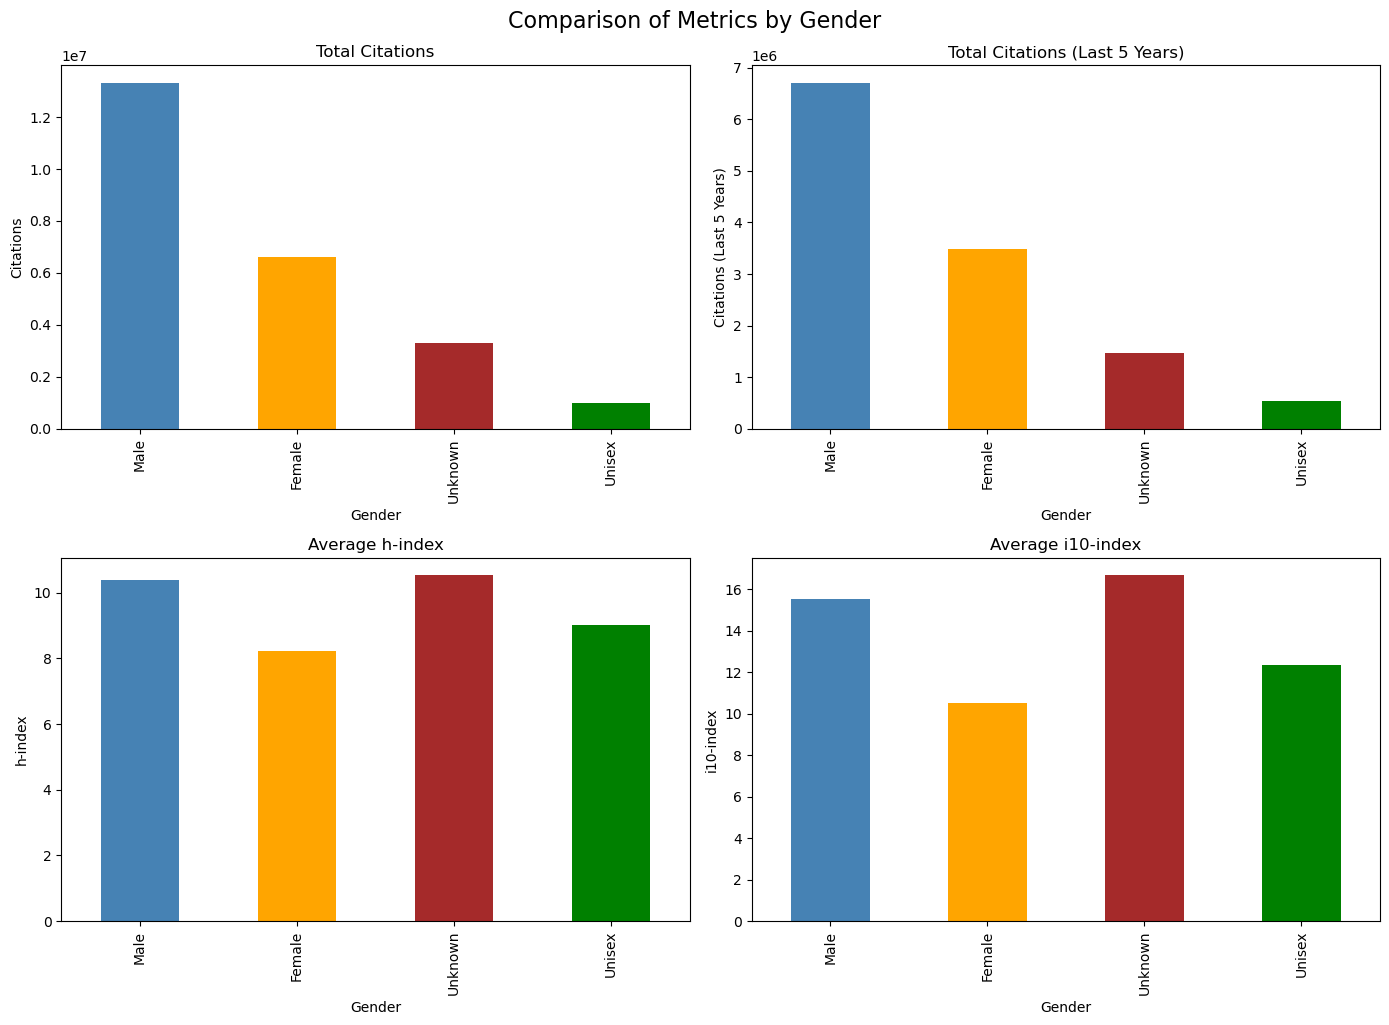

In [145]:
#comparison by type

gender_comparison = data_cleaned.groupby('Gender').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values(by='Citations', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Total Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Number of Publications']

for ax, metric, title in zip(axes.flat, metrics, titles):
    gender_comparison[metric].plot(kind='bar', ax=ax, color=['steelblue', 'orange', 'brown', 'green'])
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_xlabel('Gender')


fig.tight_layout()
plt.suptitle('Comparison of Metrics by Gender', y=1.02, fontsize=16)
plt.show()


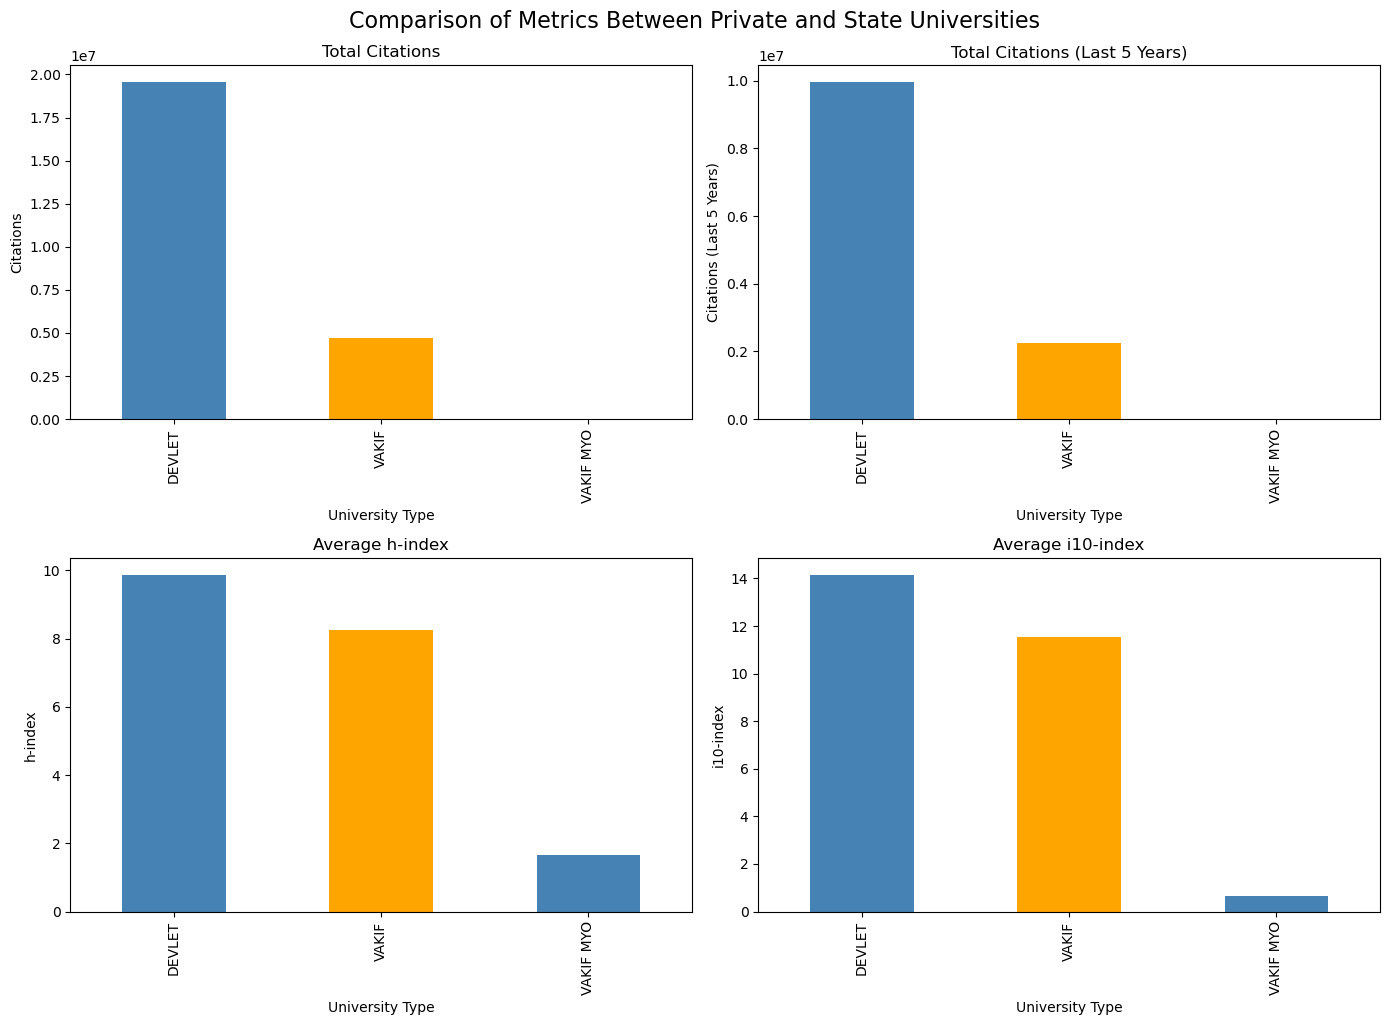

In [146]:
#comparison by type

type_comparison = data_cleaned.groupby('Type').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values(by='Citations', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index']
titles = ['Total Citations', 'Total Citations (Last 5 Years)', 'Average h-index', 'Average i10-index']

for ax, metric, title in zip(axes.flat, metrics, titles):
    type_comparison[metric].plot(kind='bar', ax=ax, color=['steelblue', 'orange'])
    ax.set_title(title)
    ax.set_ylabel(metric)
    ax.set_xlabel('University Type')

fig.tight_layout()
plt.suptitle('Comparison of Metrics Between Private and State Universities', y=1.02, fontsize=16)
plt.show()


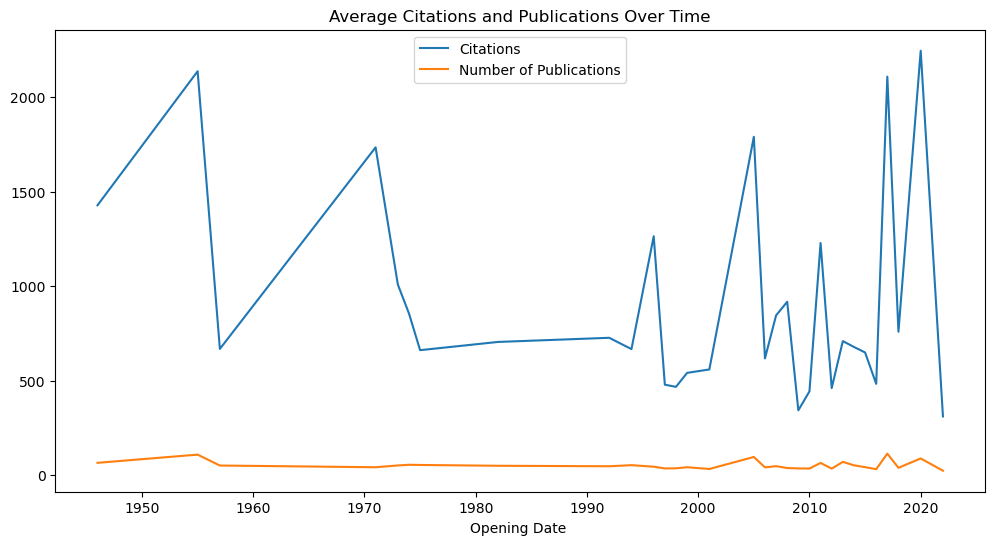

In [147]:
trend_data = data_cleaned.groupby('Opening Date ').agg({
    'Citations': 'mean',
    'Number of Publications': 'mean'
})
trend_data.plot(figsize=(12, 6), title="Average Citations and Publications Over Time")
plt.show()


In [148]:
df2 = data_cleaned[['Name','Citations','Number of Publications']]

In [149]:

df2['Citations per Publication'] = df2['Citations'] / df2['Number of Publications']
top_efficiency_author = df2.groupby('Name')['Citations per Publication'].mean().sort_values(ascending=False)
print(top_efficiency_author)

Name
Batuhan Ozyurt                 1226.000000
N. C. Tolga Emre                694.285714
Gözde Korkmaz                   612.095238
Can Alkan                       582.811024
Dr. Ebru Goncu                  535.807692
                                  ...     
Ünal Tüysüz                       0.052632
Molecular Oncologic Imaging       0.047619
Muhammet DEMİRBAŞ                 0.047619
Aygün Karlı                       0.045455
İpek Yarar                        0.043478
Name: Citations per Publication, Length: 27348, dtype: float64


/var/folders/c1/wz4767gs3gl7jgq5zqvt3xrh0000gn/T/ipykernel_3780/1823015923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Citations per Publication'] = df2['Citations'] / df2['Number of Publications']


In [150]:
df_ozu = df[df['University']=="OZYEGIN"]
df_ozu.head()

,Name,Affiliation,Citations,Citations (Last 5 Years),h-index,h-index (Last 5 Years),i10-index,i10-index (Last 5 Years),Number of Publications,Scholar ID,Profile Link,University,City,Type,Opening Date,Gender
2388,M. Pinar Menguc,"Ozyegin University, FYE Chair Professor and Di...",22475.0,4662.0,44,23,143,56,411,hVpo9CMAAAAJ,https://scholar.google.com/citations?hl=en&use...,OZYEGIN,ISTANBUL,VAKIF,2008.0,Female
2389,Goksen Goksenin Yaralioglu,Associated Professor of Electrical Engineering...,6757.0,1329.0,43,20,88,36,142,g8o-0E8AAAAJ,https://scholar.google.com/citations?hl=en&use...,OZYEGIN,ISTANBUL,VAKIF,2008.0,Female
2390,Burcu Balcik,"Industrial Engineering Department, Ozyegin Uni...",6734.0,3017.0,18,17,27,24,57,jnZEVg8AAAAJ,https://scholar.google.com/citations?hl=en&use...,OZYEGIN,ISTANBUL,VAKIF,2008.0,Female
2391,H. Canan Sümer,"Professor of Psychology, Ozyegin University",5950.0,1800.0,24,14,31,18,120,t7bBov0AAAAJ,https://scholar.google.com/citations?hl=en&use...,OZYEGIN,ISTANBUL,VAKIF,2008.0,Female
2392,Canan Ergin,"Professor, Ozyegin University",3318.0,815.0,17,11,22,12,35,2Xj9sskAAAAJ,https://scholar.google.com/citations?hl=en&use...,OZYEGIN,ISTANBUL,VAKIF,2008.0,Female


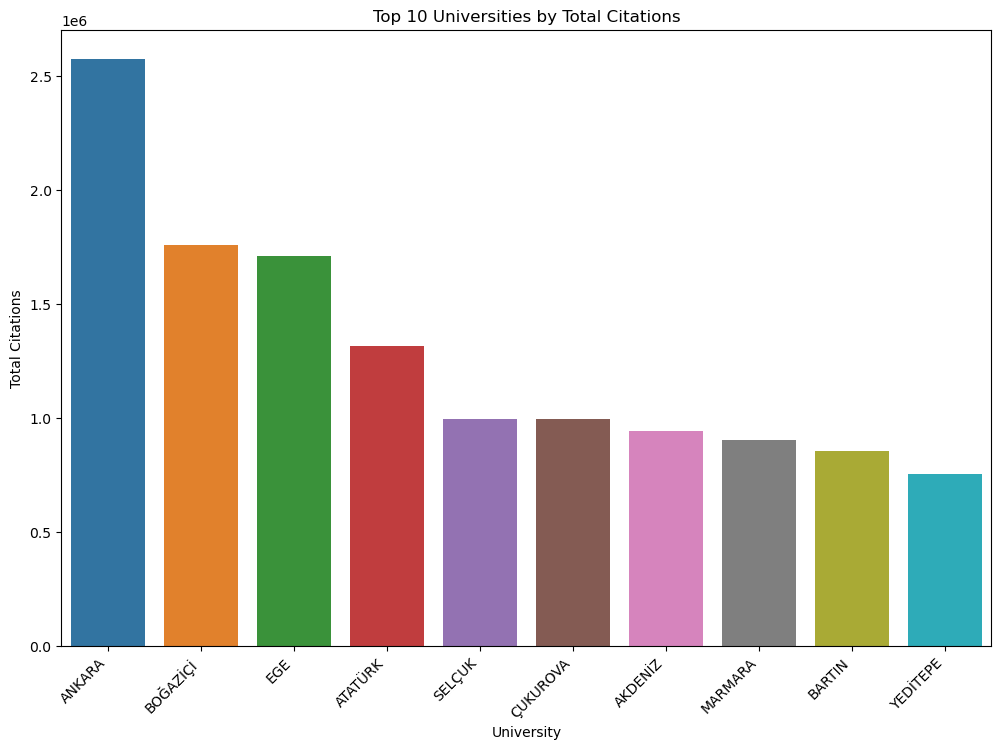

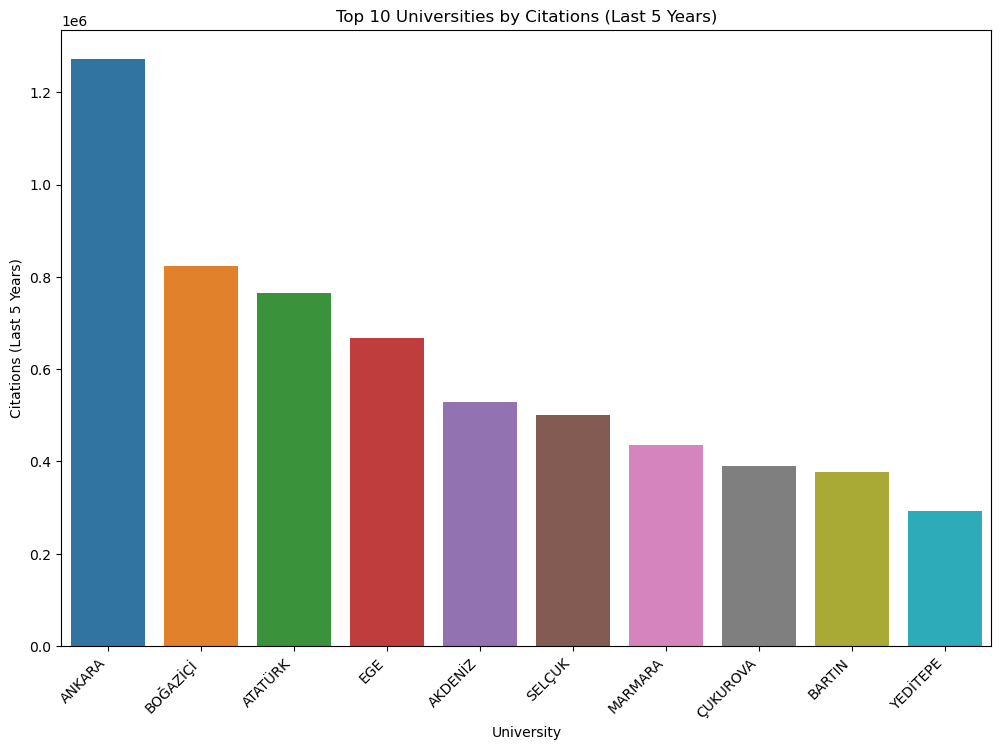

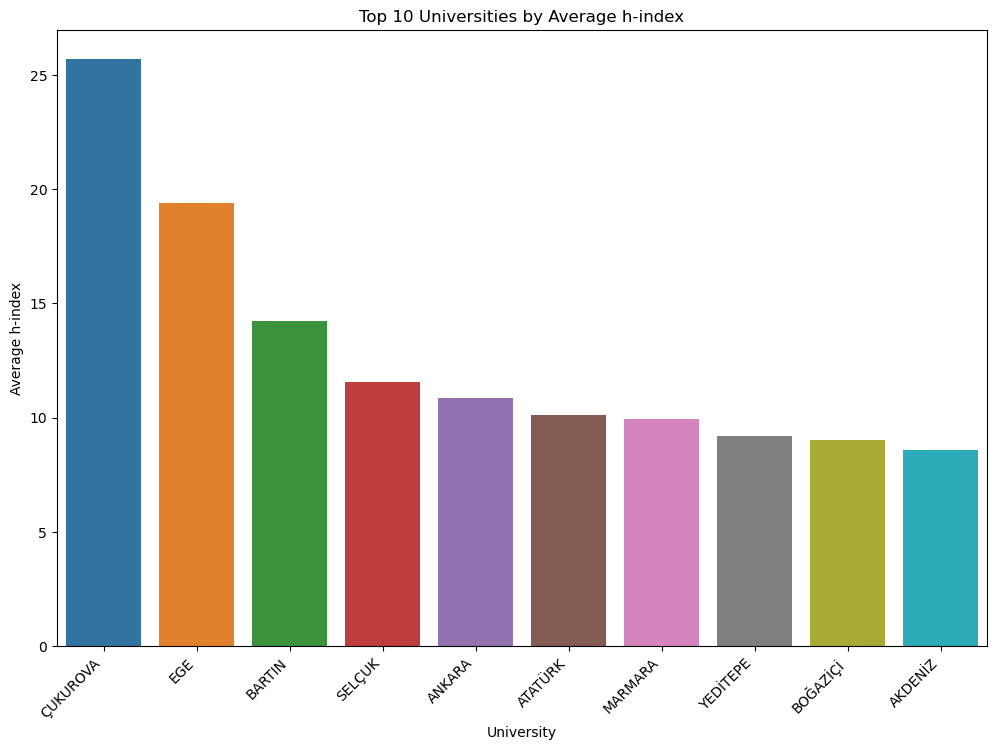

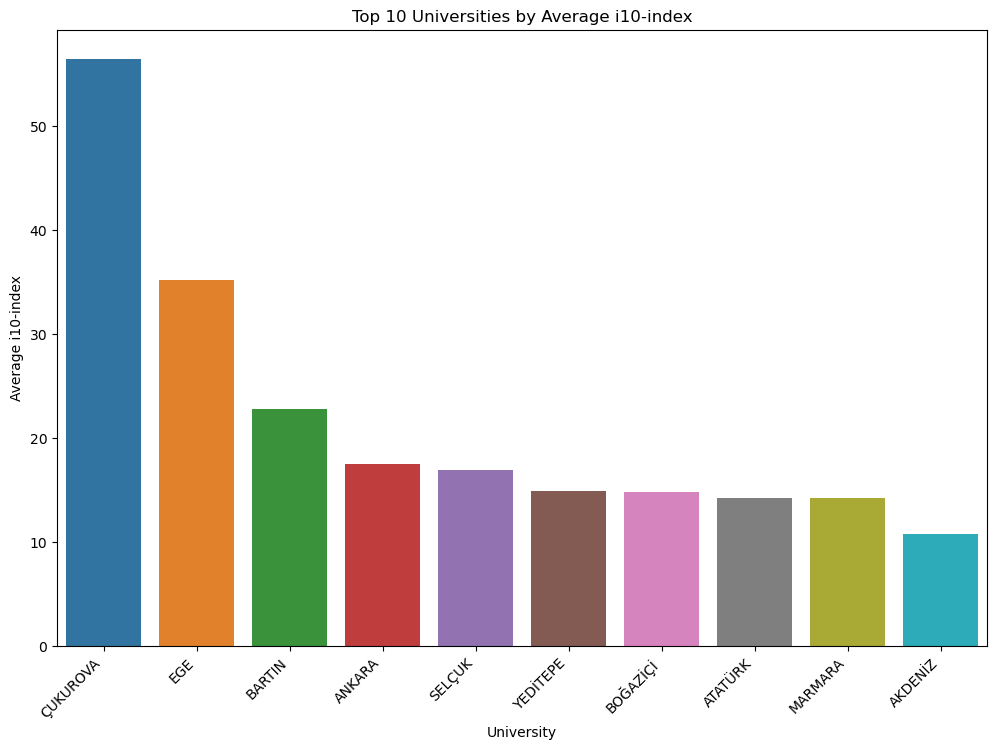

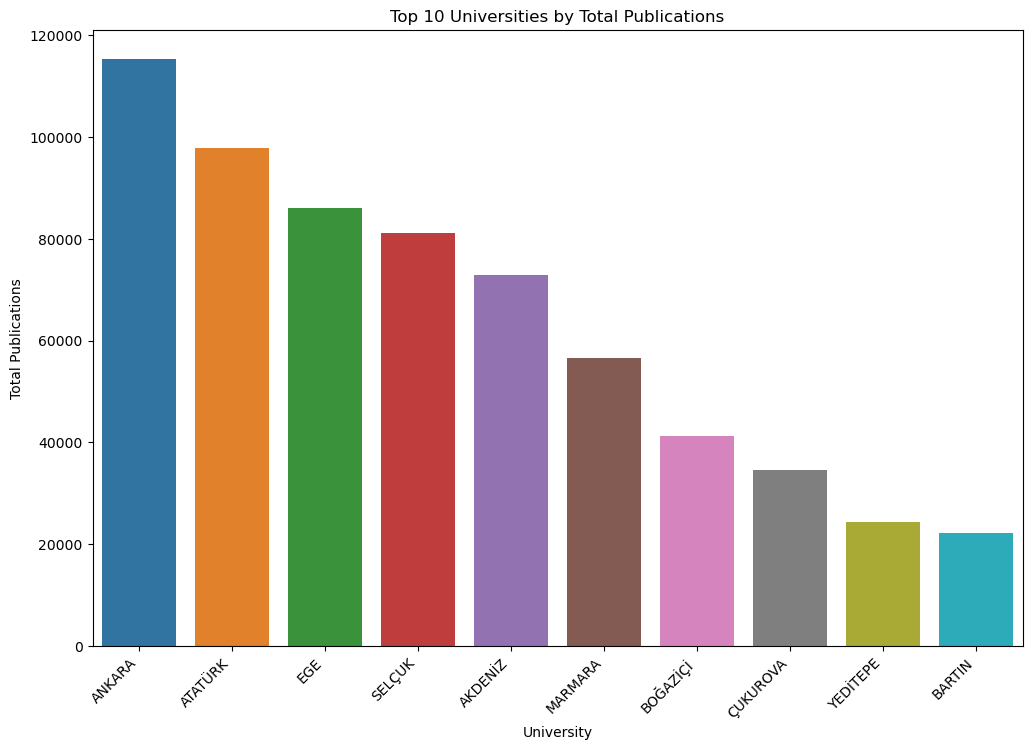

In [151]:
university_stats = data_cleaned.groupby('University').agg({
    'Citations': 'sum',
    'Citations (Last 5 Years)': 'sum',
    'h-index': 'mean',
    'i10-index': 'mean',
    'Number of Publications': 'sum'
}).sort_values('Citations', ascending=False)

top_universities = university_stats.head(10)

metrics = ['Citations', 'Citations (Last 5 Years)', 'h-index', 'i10-index', 'Number of Publications']
titles = ['Total Citations', 'Citations (Last 5 Years)', 'Average h-index', 'Average i10-index', 'Total Publications']

for metric, title in zip(metrics, titles):
    
    sorted_data = top_universities.sort_values(by=metric, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_data.index, y=sorted_data[metric])
    plt.title(f"Top 10 Universities by {title}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(title)
    plt.xlabel("University")
    plt.show()


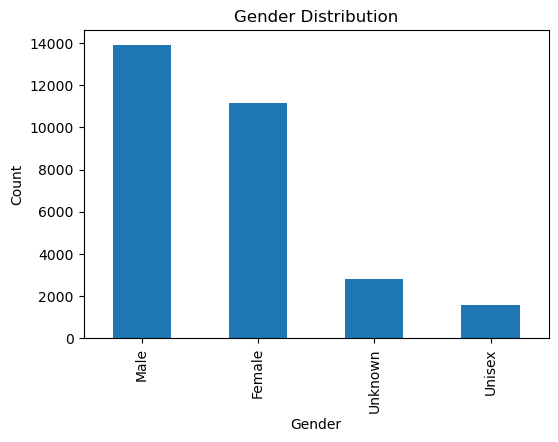

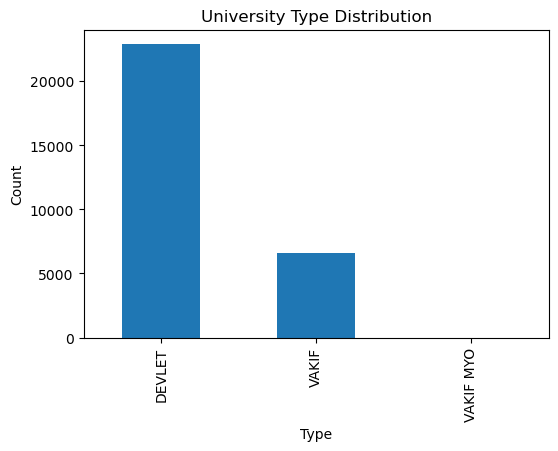

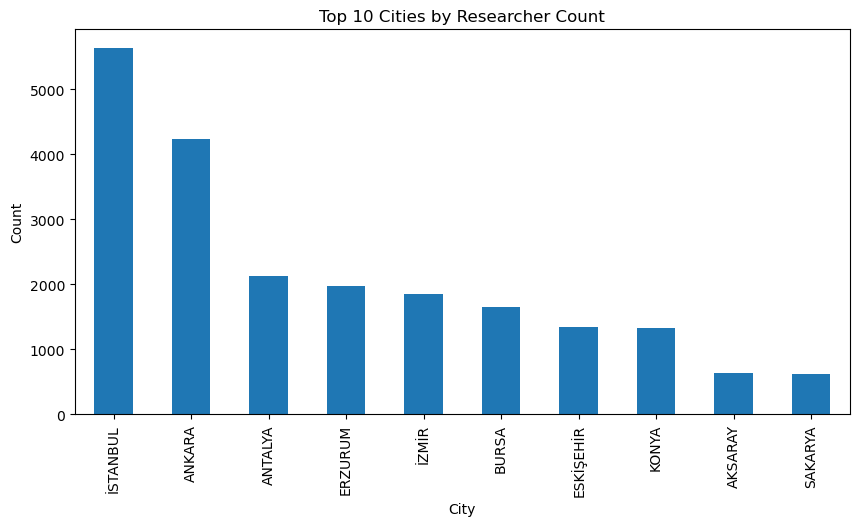

{'Numeric Stats':            Citations  Citations (Last 5 Years)       h-index  \
 count   28364.000000              28364.000000  29462.000000   
 mean      854.619835                429.917431      9.160546   
 std      5940.833939               2559.063552     10.199528   
 min         1.000000                  0.000000      0.000000   
 25%        40.000000                 31.000000      3.000000   
 50%       194.000000                128.000000      6.000000   
 75%       705.000000                384.000000     13.000000   
 max    311457.000000             142912.000000    251.000000   
 
        h-index (Last 5 Years)     i10-index  i10-index (Last 5 Years)  \
 count            29462.000000  29462.000000              29462.000000   
 mean                 7.081054     13.080341                  8.692248   
 std                  6.982243     32.266459                 24.272599   
 min                  0.000000      0.000000                  0.000000   
 25%                  2.00

In [152]:

numeric_stats = df[["Citations", "Citations (Last 5 Years)", "h-index",
                    "h-index (Last 5 Years)", "i10-index", 
                    "i10-index (Last 5 Years)", "Number of Publications"]].describe()

gender_distribution = df["Gender"].value_counts()

university_type_distribution = df["Type"].value_counts()

city_distribution = df["City"].value_counts()

summary_statistics = {
    "Numeric Stats": numeric_stats,
    "Gender Distribution": gender_distribution,
    "University Type Distribution": university_type_distribution,
    "City Distribution": city_distribution
}

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind="bar", title="Gender Distribution", xlabel="Gender", ylabel="Count")
plt.show()

plt.figure(figsize=(6, 4))
university_type_distribution.plot(kind="bar", title="University Type Distribution", xlabel="Type", ylabel="Count")
plt.show()

plt.figure(figsize=(10, 5))
city_distribution.head(10).plot(kind="bar", title="Top 10 Cities by Researcher Count", xlabel="City", ylabel="Count")
plt.show()

summary_statistics


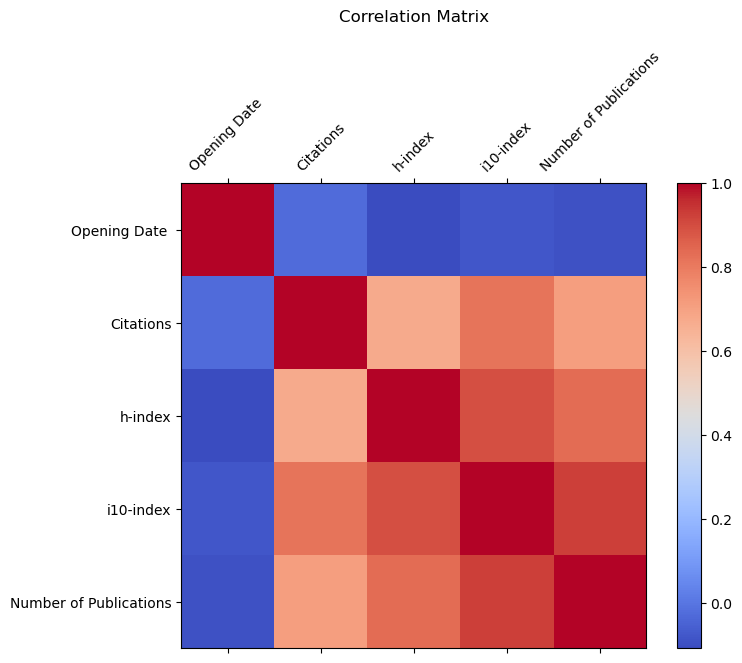

,Opening Date,Citations,h-index,i10-index,Number of Publications
Opening Date,1.000000,-0.030417,-0.108485,-0.078684,-0.094749
Citations,-0.030417,1.000000,0.674381,0.817861,0.705747
h-index,-0.108485,0.674381,1.000000,0.891767,0.833998
i10-index,-0.078684,0.817861,0.891767,1.000000,0.922927
Number of Publications,-0.094749,0.705747,0.833998,0.922927,1.000000


In [153]:
df_filtered = df[["Opening Date ", "Citations", "h-index", "i10-index", "Number of Publications"]].dropna()


correlation_matrix = df_filtered.corr()

plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()

correlation_matrix


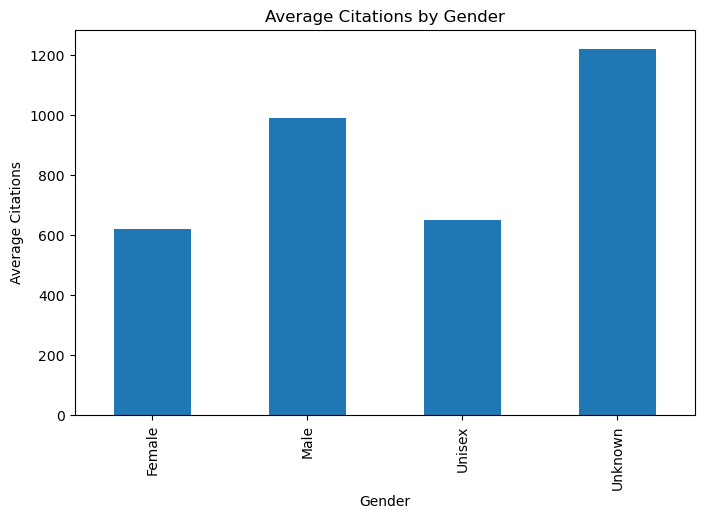

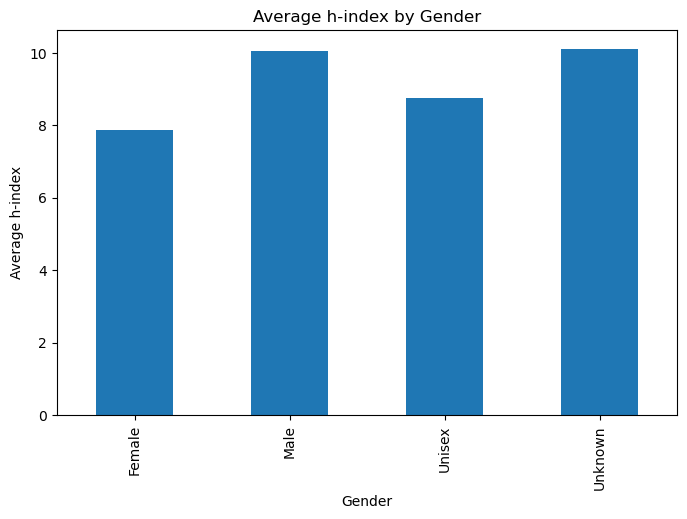

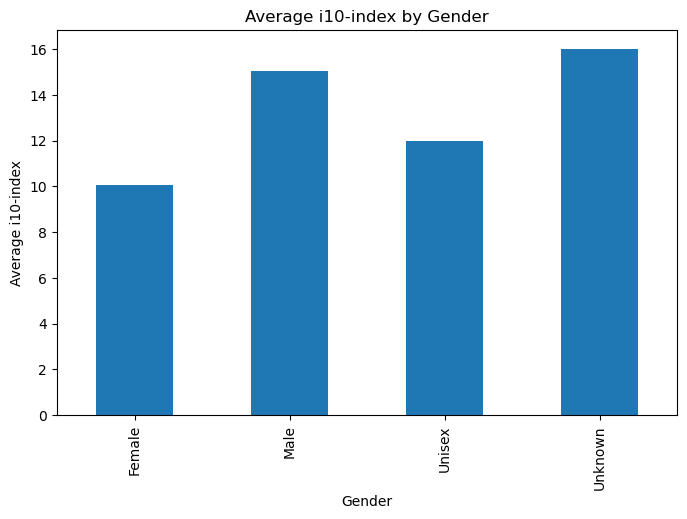

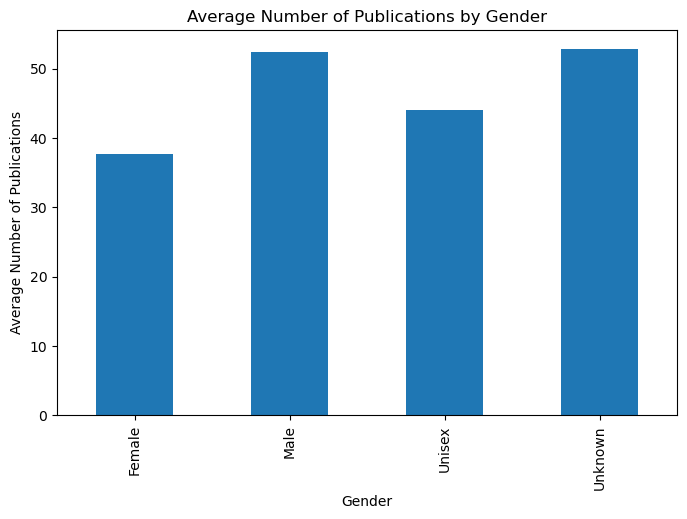

Citations           h-index         i10-index         \
                mean median       mean median       mean median   
Gender                                                            
Female    619.268373  141.0   7.865507    5.0  10.051107    4.0   
Male      990.367737  249.0  10.050593    7.0  15.034136    6.0   
Unisex    651.249182  168.0   8.749841    6.0  11.996825    5.0   
Unknown  1221.835733  223.0  10.120255    7.0  16.026250    5.0   

        Number of Publications         
                          mean median  
Gender                                 
Female               37.735856   20.0  
Male                 52.423428   30.0  
Unisex               44.110476   24.0  
Unknown              52.926924   26.0

In [154]:

gender_trends = df.groupby("Gender")[
    ["Citations", "h-index", "i10-index", "Number of Publications"]
].agg(["mean", "median"])

metrics = ["Citations", "h-index", "i10-index", "Number of Publications"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    gender_trends[metric]["mean"].plot(kind="bar", title=f"Average {metric} by Gender", ylabel=f"Average {metric}", xlabel="Gender")
    plt.show()

gender_trends


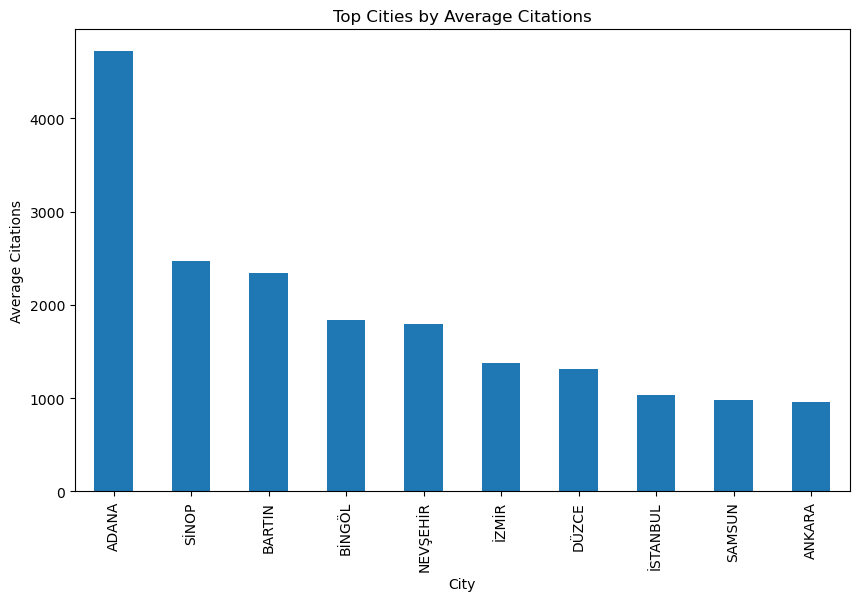

Citations            h-index         i10-index         \
                 mean  median       mean median       mean median   
City                                                                
ADANA     4716.824645  2023.0  25.639810   22.0  56.270142   38.0   
SİNOP     2466.216867   176.0  10.835294    7.0  21.917647    6.0   
BARTIN    2343.619178   372.0  13.954301    9.0  22.400538    9.0   
BİNGÖL    1836.133333   213.0  10.377049    6.5  17.385246    5.0   
NEVŞEHİR  1790.800000    59.0  14.800000    4.0  41.800000    1.0   
İZMİR     1379.961878   711.0  13.777598   13.0  22.597738   16.0   
DÜZCE     1316.069124   278.0  10.648649    8.0  16.882883    7.0   
İSTANBUL  1032.636449   128.0   8.270165    5.0  12.262010    3.0   
SAMSUN     984.155902   224.0   9.837953    7.0  14.823028    5.0   
ANKARA     961.088700   176.0   9.117536    6.0  13.584376    4.0   

         Number of Publications         
                           mean median  
City                                    
ADANA                164.165877  125.0  
SİNOP                 64.200000   28.0  
BARTIN                59.868280   31.0  
BİNGÖL                56.491803   28.5  
NEVŞEHİR              95.000000   29.0  
İZMİR                 72.879914   52.0  
DÜZCE                 54.837838   34.0  
İSTANBUL              40.758376   16.0  
SAMSUN                52.228145   29.0  
ANKARA                52.188341   26.0

In [155]:

city_trends = df.groupby("City")[
    ["Citations", "h-index", "i10-index", "Number of Publications"]
].agg(["mean", "median"]).sort_values(('Citations', 'mean'), ascending=False)

top_cities = city_trends.head(10)

plt.figure(figsize=(10, 6))
top_cities[("Citations", "mean")].plot(kind="bar", title="Top Cities by Average Citations", xlabel="City", ylabel="Average Citations")
plt.show()

top_cities


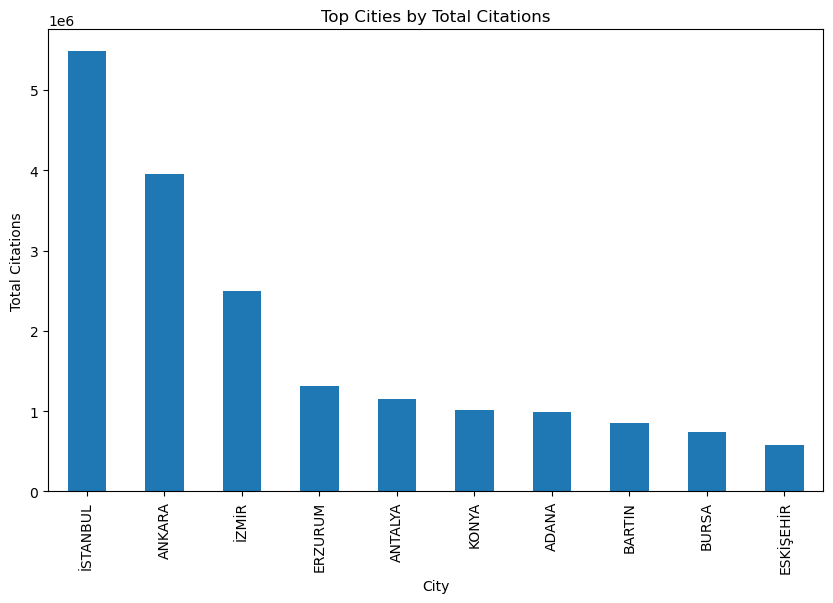

,Citations,h-index,i10-index,Number of Publications
City,,,,
İSTANBUL,5479169.0,46652,69170,229918
ANKARA,3954880.0,38631,57557,221122
İZMİR,2497731.0,25585,41964,135338
ERZURUM,1314646.0,19939,28064,97940
ANTALYA,1147414.0,17575,22031,84107
KONYA,1017510.0,14984,21812,82959
ADANA,995250.0,5410,11873,34639
BARTIN,855421.0,5191,8333,22271
BURSA,738003.0,11711,13872,56892


In [156]:
city_sum = df.groupby("City")[
    ["Citations", "h-index", "i10-index", "Number of Publications"]
].sum().sort_values("Citations", ascending=False)

top_cities_sum = city_sum.head(10)

plt.figure(figsize=(10, 6))
top_cities_sum["Citations"].plot(kind="bar", title="Top Cities by Total Citations", xlabel="City", ylabel="Total Citations")
plt.show()

top_cities_sum


In [157]:

current_year = 2025  # Assuming current year is 2025
df["University Age"] = current_year - df["Opening Date "]

mean_metrics_by_age = df.groupby("University Age")[
    ["Citations", "h-index", "i10-index", "Number of Publications"]
].mean()


sum_metrics_by_age = df.groupby("University Age")[
    ["Citations", "Number of Publications"]
].sum()


combined_metrics_by_age = mean_metrics_by_age.merge(
    sum_metrics_by_age, on="University Age", suffixes=("_Mean", "_Sum")
)

combined_metrics_by_age.tail()


,Citations_Mean,h-index,i10-index,Number of Publications_Mean,Citations_Sum,Number of Publications_Sum
University Age,,,,,,
52.0,1008.104043,9.376204,14.667989,47.800000,1695631.0,84367
54.0,1735.059113,8.325751,13.709736,37.651501,1761085.0,41379
68.0,667.332995,10.121320,14.245685,49.715736,1314646.0,97940
70.0,2137.933833,19.387016,35.203496,107.489388,1712485.0,86099
79.0,1428.088741,10.851359,17.520244,63.939545,2574844.0,115283


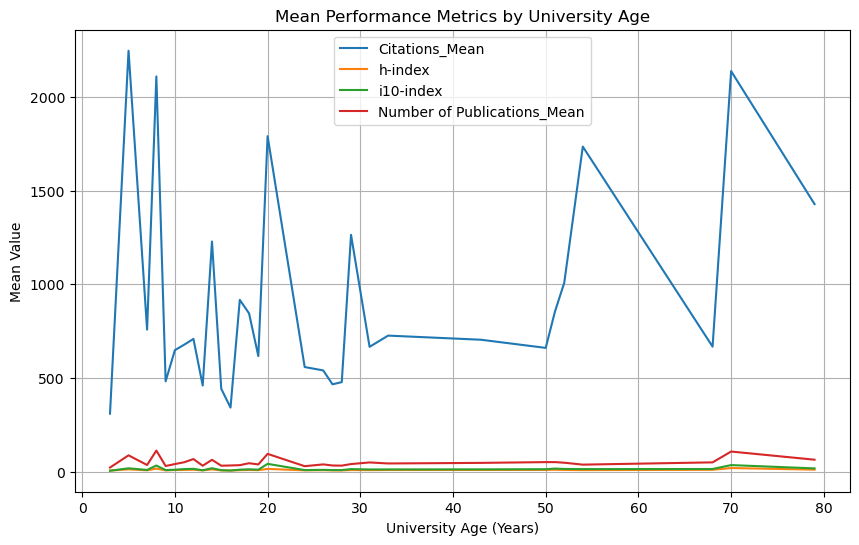

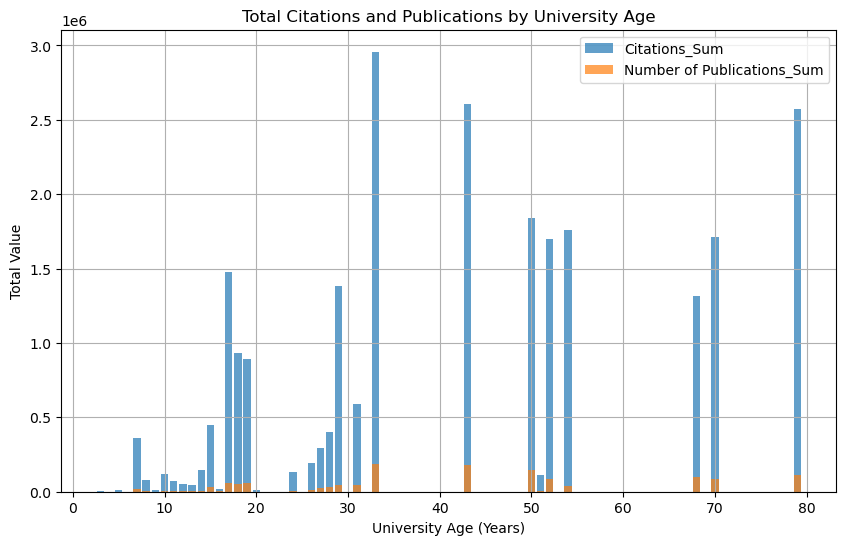

In [158]:

plt.figure(figsize=(10, 6))
for metric in ["Citations_Mean", "h-index", "i10-index", "Number of Publications_Mean"]:
    plt.plot(combined_metrics_by_age.index, combined_metrics_by_age[metric], label=metric)

plt.title("Mean Performance Metrics by University Age")
plt.xlabel("University Age (Years)")
plt.ylabel("Mean Value")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for metric in ["Citations_Sum", "Number of Publications_Sum"]:
    plt.bar(combined_metrics_by_age.index, combined_metrics_by_age[metric], label=metric, alpha=0.7)

plt.title("Total Citations and Publications by University Age")
plt.xlabel("University Age (Years)")
plt.ylabel("Total Value")
plt.legend()
plt.grid()
plt.show()


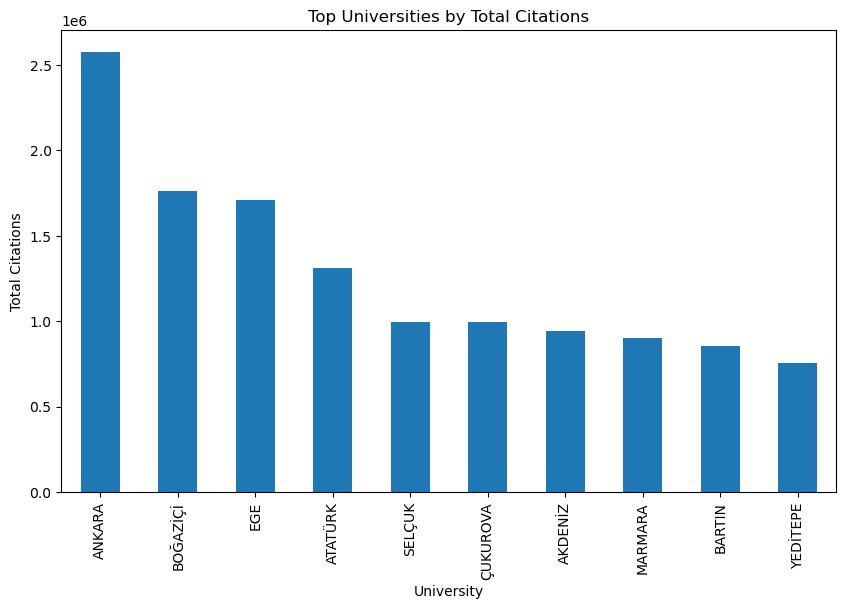

In [159]:
#University-based analysis:
university_analysis = df.groupby("University")[
    ["Citations", "h-index", "i10-index", "Number of Publications"]
].agg(["mean", "sum"])


top_universities = university_analysis.sort_values(("Citations", "sum"), ascending=False).head(10)

top_authors = df.sort_values("Citations", ascending=False).head(10)[
    ["Name", "University", "Citations", "h-index", "i10-index", "Number of Publications"]
]

plt.figure(figsize=(10, 6))
top_universities[("Citations", "sum")].plot(kind="bar", title="Top Universities by Total Citations", xlabel="University", ylabel="Total Citations")
plt.show()


In [160]:
top_universities_display = top_universities.reset_index()
top_authors_display = top_authors.reset_index(drop=True)

top_universities_html = top_universities_display.to_html(index=False)
top_authors_html = top_authors_display.to_html(index=False)

top_universities_display


University    Citations               h-index         i10-index         \
                     mean        sum       mean    sum       mean    sum   
0     ANKARA  1428.088741  2574844.0  10.851359  19565  17.520244  31589   
1   BOĞAZİÇİ  1735.059113  1761085.0   8.325751   9150  13.709736  15067   
2        EGE  2140.566250  1712453.0  19.408750  15527  35.246250  28197   
3    ATATÜRK   667.332995  1314646.0  10.121320  19939  14.245685  28064   
4     SELÇUK   785.877760   996493.0  11.544953  14639  16.905363  21436   
5   ÇUKUROVA  4735.071429   994365.0  25.685714   5394  56.452381  11855   
6    AKDENİZ   528.874228   941925.0   8.150480  15274  10.231057  19173   
7    MARMARA   916.136917   903311.0   9.956389   9817  14.228195  14029   
8     BARTIN  2343.619178   855421.0  13.954301   5191  22.400538   8333   
9   YEDİTEPE  1427.722642   756693.0   8.448873   4875  13.674177   7890   

  Number of Publications          
                    mean     sum  
0              63.939545  115283  
1              37.651501   41379  
2             107.615000   86092  
3              49.715736   97940  
4              63.949527   81088  
5             164.709524   34589  
6              39.010139   73105  
7              57.421907   56618  
8              59.868280   22271  
9              42.604853   24583

In [161]:
top_authors_display

,Name,University,Citations,h-index,i10-index,Number of Publications
0,Veysi Erkcan Ozcan,BOĞAZİÇİ,311457.0,236,1400,2715
1,Hatice Duran Yildiz,ANKARA,303026.0,250,1114,2062
2,Orhan CAKIR,ANKARA,290872.0,251,1009,2135
3,Serhat Istin,YEDİTEPE,288205.0,237,916,1086
4,Erhan Gülmez,BOĞAZİÇİ,266240.0,243,1303,2999
5,Aysel Kayış Topaksu (ResearcherID B-8910-2018),ÇUKUROVA,258763.0,240,1201,2999
6,Prof. Dr. Mithat Kaya,MARMARA,227767.0,212,882,2415
7,Bora Akgün,BOĞAZİÇİ,224578.0,233,1072,2107
8,Metin ARIK,BOĞAZİÇİ,222196.0,187,540,1287
9,Albert Einstein,ANKARA,202405.0,156,810,2801


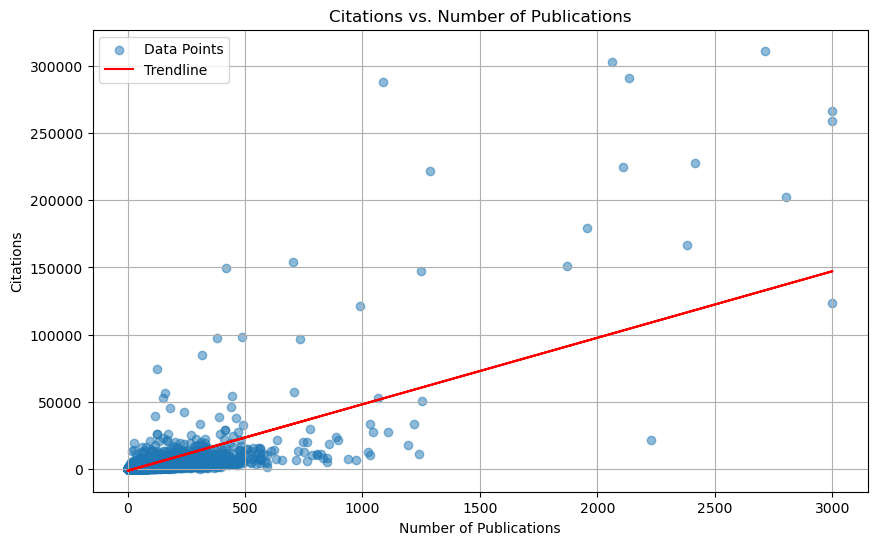

In [163]:

filtered_df = df.dropna(subset=["Citations", "Number of Publications"])

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["Number of Publications"], filtered_df["Citations"], alpha=0.5, label="Data Points")

z = np.polyfit(filtered_df["Number of Publications"], filtered_df["Citations"], 1)
p = np.poly1d(z)
plt.plot(filtered_df["Number of Publications"], p(filtered_df["Number of Publications"]), color="red", label="Trendline")

plt.title("Citations vs. Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("Citations")
plt.legend()
plt.grid()
plt.show()
